In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sn

# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors
from IPython.display import HTML
from PIL import Image
from io import BytesIO

In [30]:
########   Prepare Data     ########
#Import Data
df = pd.read_excel("DataTb.xlsx",sheet_name="AllDataSet")

#Select feature for data
X_data= df.drop(columns ={"Name","Tb","CAS","Type","Formular","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","C","Double", "Triple", "Bracket", "Cyclic"})
Y_data= df["Tb"]

#
df2= df.drop(columns ={"CAS","Type","Formular","Unnamed: 11","Unnamed: 12","Unnamed: 13","Unnamed: 14","C","Double", "Triple", "Bracket", "Cyclic"})

,Name,SMILES,Tb,Structure
0,methane,C,111.65,
1,ethane,CC,184.55,
2,propane,CCC,231.05,
3,Cyclopropane,C1CC1,240.35,
4,2-Methylpropane,CC(C)C,261.45,
...,...,...,...,...
555,4-UNDECYNE,CCCCCCC#CCCC,471.65,
556,n-decane,CCCCCCCCCC,447.25,
557,2-Undecyne,CCCCCCCCC#CC,477.35,
558,"Cyclopentane,heptyl-",CCCCCCCC1CCCC1,497.15,

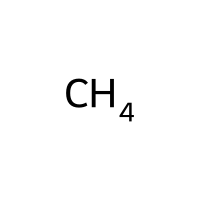
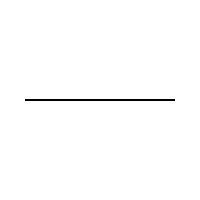
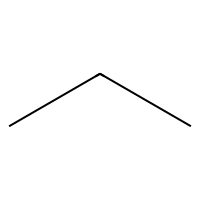
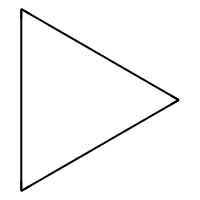
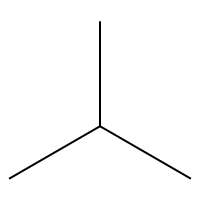
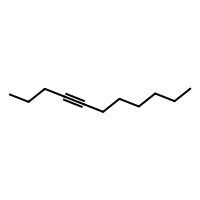
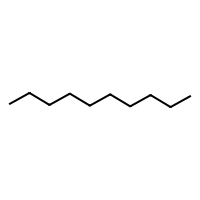
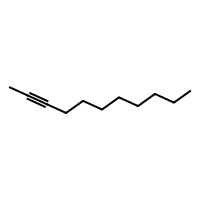
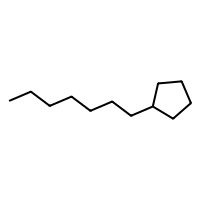
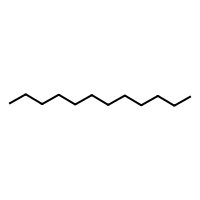

In [31]:
from rdkit.Chem import PandasTools
df4 = df2
PandasTools.AddMoleculeColumnToFrame(df4,'SMILES', 'Structure')
df4

In [32]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

C:\Users\Kan\AppData\Local\Temp\ipykernel_19616\1694978098.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [33]:
df5 = df4.iloc[[400]]
#HTML(df5[['Name','SMILES', 'Tb', 'Structure']].to_html(formatters={'Structure': image_formatter}, escape=False))
df5

,Name,SMILES,Tb,Structure
400,"2,2,3-Trimethylpentane",CCC(C)C(C)(C)C,383.15,<rdkit.Chem.rdchem.Mol object at 0x00000216B7B2E2D0>
